In [57]:
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold, cross_val_score as CVS, train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import datetime

In [58]:
data =load_boston()

In [59]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [62]:
x = data.data
y = data.target

In [63]:
import pandas as pd
xx = pd.DataFrame(x)
yy = pd.DataFrame(y)

In [67]:
xx.columns = data.feature_names

In [70]:
yy.columns = ['target']

In [72]:
Boston = pd.concat([xx,yy],axis=1)
Boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
x.shape

(506, 13)

In [7]:
y.shape

(506,)

In [8]:
xtrain,xtest,ytrain,ytest = TTS(x,y,test_size=0.3,random_state=420)

In [9]:
reg = XGBR(n_estimators=100).fit(xtrain,ytrain)
reg.predict(xtest)

array([ 6.6689262, 22.34918  , 31.052807 , 13.911593 ,  9.467967 ,
       22.658588 , 14.514282 , 15.092699 , 15.293644 , 12.680115 ,
       24.140797 , 35.890083 , 21.573483 , 27.07066  , 19.052658 ,
        9.89033  , 23.386076 , 23.588493 , 23.311466 , 22.401644 ,
       18.98444  , 15.766946 , 25.8352   , 20.193802 , 19.982517 ,
       15.611423 , 22.883228 , 29.838228 , 22.815304 , 16.779034 ,
       37.13194  , 20.133307 , 19.67352  , 23.525528 , 22.845137 ,
       23.87397  , 15.17887  , 23.45934  , 16.685331 , 31.761686 ,
       18.525843 , 22.441063 , 38.48728  , 17.93719  , 15.10122  ,
       28.980541 , 46.363487 , 12.842797 ,  9.618281 , 35.40579  ,
       25.657566 , 20.605602 , 20.800055 , 49.228447 , 31.355848 ,
       29.382515 , 18.911947 , 21.049877 , 16.165169 , 18.098577 ,
       14.659002 , 21.720213 , 19.413454 , 28.932102 , 30.573524 ,
       19.228426 , 20.531511 , 15.666288 , 23.52929  , 19.30554  ,
       28.384985 , 42.83562  , 29.429724 , 23.306015 , 19.7412

In [10]:
reg.score(xtest,ytest) #返回的R2的评估指标

0.9050988954757183

In [11]:
y.mean()#y的均值

22.532806324110677

In [12]:
MSE(ytest,reg.predict(xtest))
#mse误差
#占到y均值大概1/3

8.830916470718748

In [13]:
reg.feature_importances_
#查看模型重要性分数，每个特征的贡献性的打分
#每个特征对模型对结果的贡献程度

array([0.01902167, 0.0042109 , 0.01478317, 0.00553536, 0.02222195,
       0.37914094, 0.01679687, 0.04698721, 0.04073574, 0.05491758,
       0.0668422 , 0.00869463, 0.32011184], dtype=float32)

### 交叉验证，与线性回归&随机森林回归进行对比

In [14]:
reg = XGBR(n_estimators=100)
CVS(reg,xtrain,ytrain,cv=5).mean()

0.7995062802699481

In [15]:
CVS(reg,xtrain,ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-16.215644658473447

In [16]:
#查看一次啊sklearn中所有的模型评估指标
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [17]:
#使用随机森林和线性回归进行一个对比
rfr = RFR(n_estimators=100)
CVS(rfr,xtrain,ytrain,cv=5).mean()

0.7967182315768035

In [18]:
CVS(rfr,xtrain,ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-17.37860370490946

In [19]:
lr = LinearR()
CVS(lr,xtrain,ytrain,cv=5).mean()

0.6835070597278097

In [20]:
CVS(lr,xtrain,ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-25.34950749364836

In [21]:
#开启参数slient：在数据巨大，预料到算法运行会非常缓慢的时候可以使用这个参数来监控模型的训练进度
reg = XGBR(n_estimators=10,silent=False)
CVS(reg,xtrain,ytrain,cv=5,scoring='neg_mean_squared_error').mean()

[15:08:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:08:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:08:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings

-18.63373361656663

In [22]:
def plot_learning_curve(estimator,title, X, y,ax=None, #选择子图
                        ylim=None, #设置纵坐标的取值范围
                        cv=None, #交叉验证
                        n_jobs=None #设定索要使用的线程
                       ):
    
    from sklearn.model_selection import learning_curve
    import matplotlib.pyplot as plt
    import numpy as np
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y
                                                            ,shuffle=True
                                                            ,cv=cv
                                                           # ,random_state=420
                                                            ,n_jobs=n_jobs)      
    if ax == None:
        ax = plt.gca()
    else:
        ax = plt.figure()
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid() #绘制网格，不是必须
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r",label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-'
           , color="g",label="Test score")
    ax.legend(loc="best")
    return ax


### 使用学习曲线观察XGB在波士顿数据集上的潜力

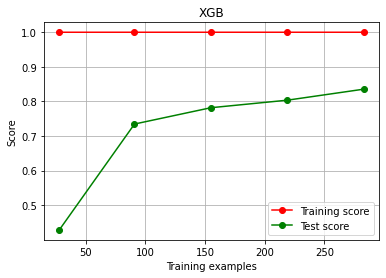

In [23]:
cv = KFold(n_splits=5, shuffle = True, random_state=42)
plot_learning_curve(XGBR(n_estimators=100,random_state=420)
                    ,"XGB",xtrain,ytrain,ax=None,cv=cv)
plt.show()
#多次运行，观察结果，这是怎么造成的？
#在现在的状况下，如何看数据的潜力？还能调上去么？

### 使用参数学习曲线观察n_eatimators对模型的影响

160 0.8320776685832459


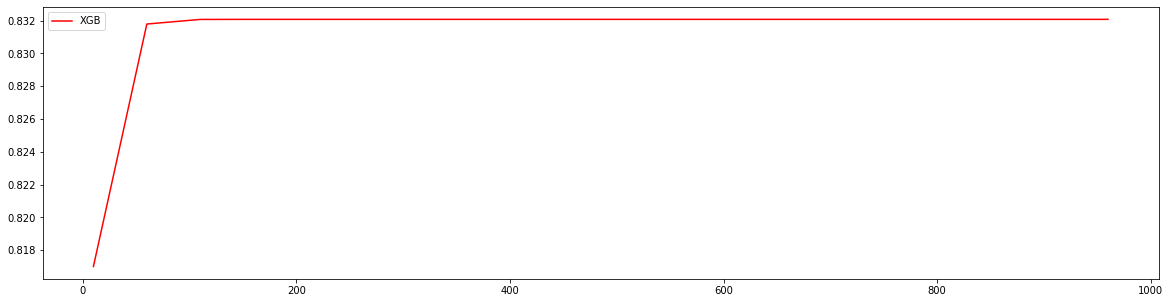

In [24]:
axisx = range(10,1010,50)
rs = []
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420)
    rs.append(CVS(reg,xtrain,ytrain,cv=cv).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()
#选出来的n_estimators非常不寻常，我们是否要选择准确率最高的n_estimators值呢？

### 进化学习曲线

100 0.8320924479019667 0.005344209691331517
100 0.8320924479019667 0.005344209691331517
100 0.8320924479019667 0.005344209691331517 0.03353715574288529


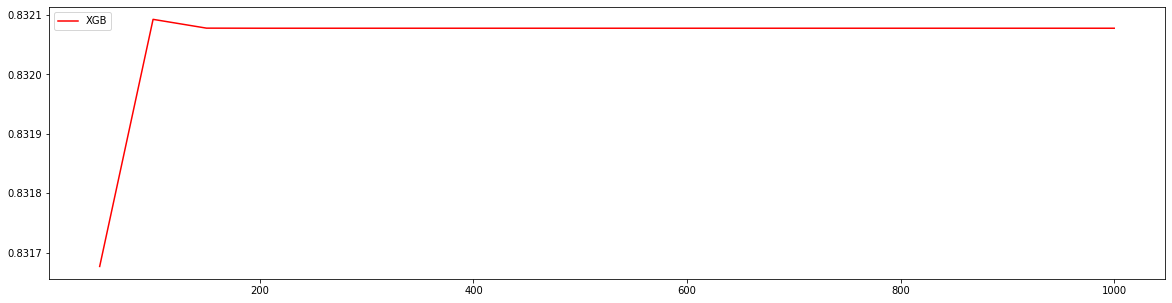

In [29]:
axisx = range(50,1050,50)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420)
    cvresult = CVS(reg,xtrain,ytrain,cv=cv)
    #记录1-偏差
    rs.append(cvresult.mean())
    #记录方差
    var.append(cvresult.var())
    #计算泛化误差的可控部分
    ge.append((1 - cvresult.mean())**2+cvresult.var())
#打印R2最高所对应的参数取值，并打印这个参数下的方差
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
#打印方差最低时对应的参数取值，并打印这个参数下的R2
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
#打印泛化误差可控部分的参数取值，并打印这个参数下的R2，方差以及泛化误差的可控部分
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c='red',label='XGB')
plt.legend()
plt.show()

### eta

In [37]:
#定义一个评分函数
#这个评分函数能够帮助我们直接打印Xtrain上的交叉验证结果

In [36]:
def regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2"],show=True):
    score = []
    for i in range(len(scoring)):
        if show:
            print("{}:{:.2f}".format(scoring[i],CVS(reg,Xtrain,Ytrain,cv=cv,scoring=scoring[i]).mean()))
        score.append(CVS(reg,Xtrain,Ytrain,cv=cv,scoring=scoring[i]).mean())
    return score

In [38]:
regassess(reg,xtrain,ytrain,cv,scoring=['r2','neg_mean_squared_error'])

r2:0.83
neg_mean_squared_error:-12.11


[0.8320775169264156, -12.108527377728901]

In [39]:
regassess(reg,xtrain,ytrain,cv,scoring=['r2','neg_mean_squared_error'],show=False)

[0.8320775169264156, -12.108527377728901]

In [45]:
#观察不同的eta对模型的影响
from time import time
import datetime
for i in [0,0.2,0.5,1]:
    time0=time()
    reg = XGBR(n_estimators=180,random_state=420,learning_rate=i)
    print("learning_rate = {}".format(i))
    regassess(reg,xtrain,ytrain,cv,scoring = ["r2","neg_mean_squared_error"])
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
    print('\t')

learning_rate = 0
r2:-6.76
neg_mean_squared_error:-567.55
00:00:889932
	
learning_rate = 0.2
r2:0.83
neg_mean_squared_error:-12.30
00:01:204572
	
learning_rate = 0.5
r2:0.82
neg_mean_squared_error:-12.48
00:00:735768
	
learning_rate = 1
r2:0.71
neg_mean_squared_error:-20.06
00:00:553062
	


0.1 0.8354667463386021


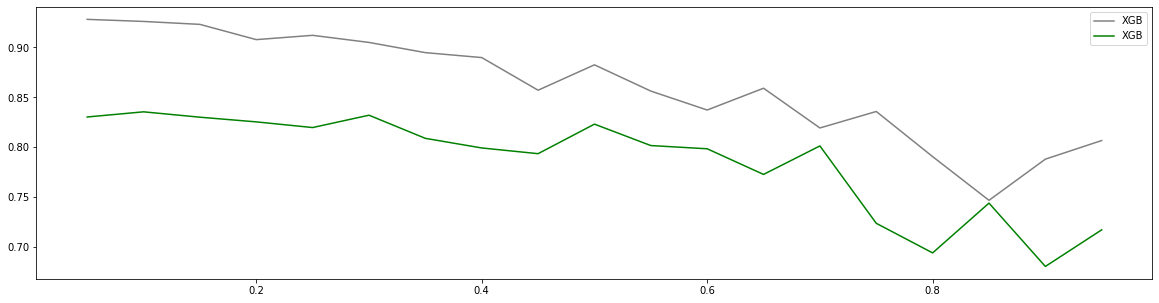

In [47]:
#画出学习曲线更近一步观察eta
axisx = np.arange(0.05,1,0.05)
rs = []
te = []
for i in axisx:
    reg = XGBR(n_estimators=180,random_state=420,learning_rate=i)
    score = regassess(reg,xtrain,ytrain,cv,scoring=['r2','neg_mean_squared_error'],show=False)
    test = reg.fit(xtrain,ytrain).score(xtest,ytest)
    rs.append(score[0])
    te.append(test)
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,te,c="gray",label="XGB")
plt.plot(axisx,rs,c="green",label="XGB")
plt.legend()
plt.show()

### 参数booster选择弱评估器

In [54]:
for booster in ["gbtree","gblinear","dart"]:
    reg = XGBR(n_estimators=180,learning_rate=0.1,random_state=420,booster=booster).fit(xtrain,ytrain)
    print(booster)
    print(reg.score(xtest,ytest))

gbtree
0.9260984298390122
gblinear
0.6483253705627375
dart
0.9260984373654245


### XGB的目标函数：重要参数obj

In [57]:
#默认reg:linear
#用于与之后的xgb的对比
reg = XGBR(n_estimators=180,random_state=420).fit(xtrain,ytrain)
reg.score(xtest,ytest)
MSE(ytest,reg.predict(xtest))

8.835224213421986

In [76]:
r2_score(ytest,reg.predict(xtest))

0.9050526024842831

In [55]:
import xgboost as xgb


In [56]:
#使用类DMatrix读取数据
dtrain = xgb.DMatrix(xtrain,ytrain) #xgb中不像sklearn只传入xtrain就行了，需要把特征和标签都传入
dtest = xgb.DMatrix(xtest,ytest)

In [60]:
dtrain#一般线先pandas先查看数据再放入dmatrix

In [71]:
#写明参数，silent默认为False，通常需要手动将它关闭
param = {'silent':True,'objective':'reg:squarederror',"eta":0.1}
num_round = 180#就是n_estimators

In [72]:
#类train，可以直接导入的参数是训练数据，树的数量，其他参数都需要通过params来导入
bst = xgb.train(param, dtrain, num_round) 

[15:15:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [74]:
#接口predict
from sklearn.metrics import r2_score
r2_score(ytest,bst.predict(dtest))

0.9260984298390122

In [75]:
MSE(ytest,bst.predict(dtest))

6.87682821415069

### 让树停止生长的参数gamma


In [17]:
import xgboost as xgb
dfull = xgb.DMatrix(x,y)

In [18]:
#设定参数
param1 = {'obj':'reg:linear','gamma':0}
num_round=180
n_fold=5

In [19]:
#使用类xgb.cv
time0=time()
curesult1 = xgb.cv(param1,dfull,num_round,n_fold) #一种交叉验证方法


[14:44:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { obj } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:44:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { obj } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:44:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { obj } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  pa

In [20]:
curesult1

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,17.105578,0.129116,17.163215,0.584297
1,12.337973,0.097557,12.519735,0.473457
2,8.994071,0.065756,9.404534,0.472310
3,6.629481,0.050323,7.250335,0.500342
4,4.954406,0.033209,5.920812,0.591874
...,...,...,...,...
175,0.001299,0.000289,3.669898,0.857676
176,0.001285,0.000261,3.669897,0.857678
177,0.001275,0.000239,3.669903,0.857669
178,0.001263,0.000217,3.669901,0.857672


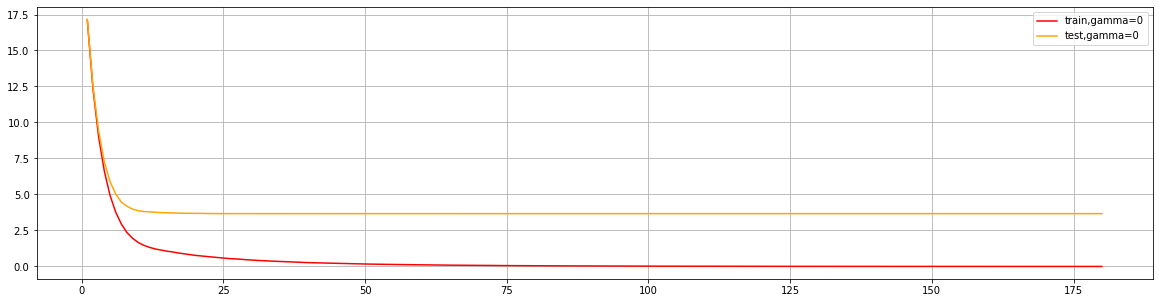

In [21]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,181),curesult1.iloc[:,0],c="red",label="train,gamma=0")
plt.plot(range(1,181),curesult1.iloc[:,2],c="orange",label="test,gamma=0")
plt.legend()
plt.show()

#### 用一个例子来试试

In [22]:
from sklearn.datasets import load_breast_cancer
data2 = load_breast_cancer()

In [23]:
x2 = data2.data
y2 = data2.target
dfull2 = xgb.DMatrix(x2,y2)

In [24]:
param1 = {'silent':True,'obj':'binary:logistic',"gamma":0,"nfold":5}
param2 = {'silent':True,'obj':'binary:logistic',"gamma":2,"nfold":5}
num_round = 100
time0 = time()

In [25]:
cvresult1 = xgb.cv(param1, dfull2, num_round,metrics=("error"))
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

[15:26:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { nfold, obj, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:26:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { nfold, obj, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:26:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { nfold, obj, silent } might not be used.

  This may not be accurate due to some parameter

In [26]:
time0 = time()
cvresult2 = xgb.cv(param2, dfull2, num_round,metrics=("error")) 
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

[15:27:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { nfold, obj, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:27:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { nfold, obj, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:27:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { nfold, obj, silent } might not be used.

  This may not be accurate due to some parameter

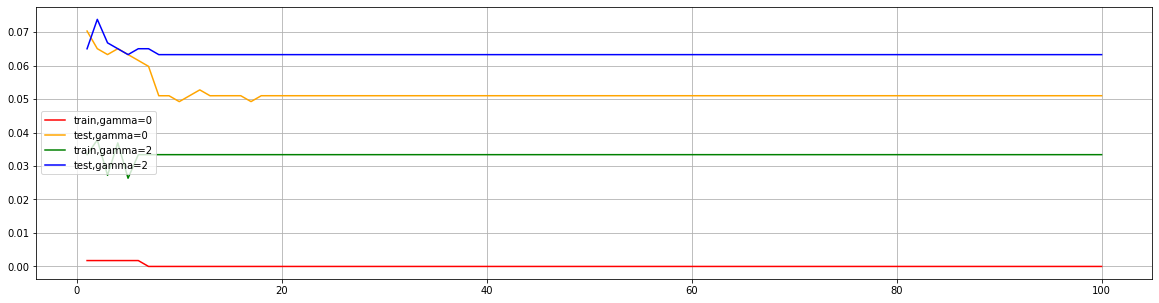

In [27]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,101),cvresult1.iloc[:,0],c="red",label="train,gamma=0")
plt.plot(range(1,101),cvresult1.iloc[:,2],c="orange",label="test,gamma=0")
plt.plot(range(1,101),cvresult2.iloc[:,0],c="green",label="train,gamma=2")
plt.plot(range(1,101),cvresult2.iloc[:,2],c="blue",label="test,gamma=2")
plt.legend()
plt.show()

### 过拟合：剪枝参数与回归模型调参

In [30]:
dfull = xgb.DMatrix(x,y)
param1 = {'silent':True #并非默认
         ,'obj':'reg:linear' #并非默认
         ,"subsample":1,"max_depth":6,"eta":0.3,"gamma":0,"lambda":1,"alpha":0,"colsample_bytree":1,"colsample_bylevel":1
         ,"colsample_bynode":1
         ,"nfold":5}
num_round = 200
time0 = time()
cvresult1 = xgb.cv(param1, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

[10:49:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { nfold, obj, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:49:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { nfold, obj, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:49:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { nfold, obj, silent } might not be used.

  This may not be accurate due to some parameter

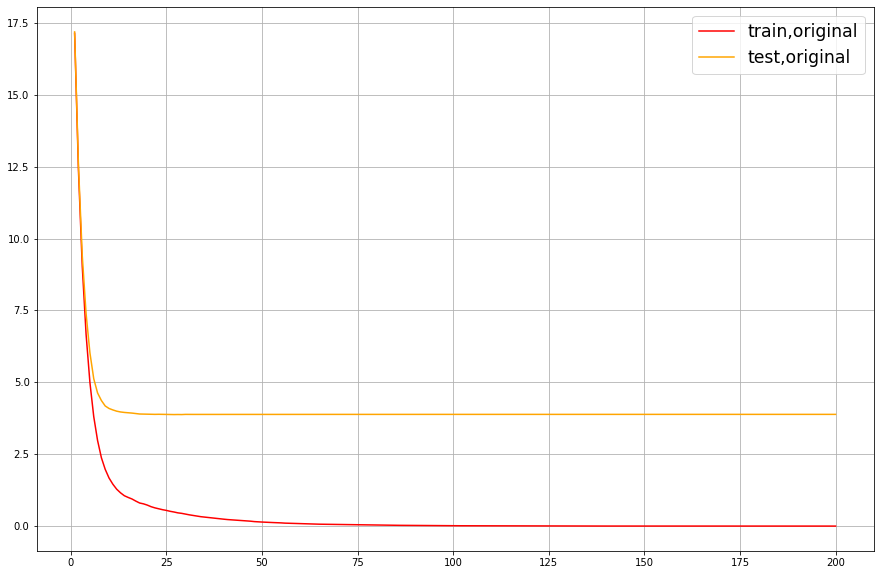

In [31]:
fig,ax = plt.subplots(1,figsize=(15,10))
#ax.set_ylim(top=5)
ax.grid()
ax.plot(range(1,201),cvresult1.iloc[:,0],c="red",label="train,original")
ax.plot(range(1,201),cvresult1.iloc[:,2],c="orange",label="test,original")
ax.legend(fontsize="xx-large")
plt.show()

In [37]:
time0 = time()
cvresult3 = xgb.cv(param3, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

[10:57:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { nfold, obj, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:57:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { nfold, obj, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:57:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { nfold, obj, silent } might not be used.

  This may not be accurate due to some parameter

In [39]:
ax.plot(range(1,201),cvresult2.iloc[:,0],c="green",label="train,last")
ax.plot(range(1,201),cvresult2.iloc[:,2],c="blue",label="test,last")
ax.plot(range(1,201),cvresult3.iloc[:,0],c="gray",label="train,this")
ax.plot(range(1,201),cvresult3.iloc[:,2],c="pink",label="test,this")
ax.legend(fontsize="xx-large")
plt.show()

### 保存和调用模型
pickle

In [41]:
import pickle
dtrain = xgb.DMatrix(xtrain,ytrain) #设定参数，对模型进行训练
param = {'silent':True,'obj':'reg:linear'
         ,"subsample":1
         ,"eta":0.05
         ,"gamma":20
         ,"lambda":3.5,"alpha":0.2,"max_depth":4,"colsample_bytree":0.4,"colsample_bylevel":0.6,"colsample_bynode":1}
num_round = 180
bst = xgb.train(param, dtrain, num_round) #保存模型
pickle.dump(bst, open("xgboostonboston.dat","wb"))
#注意，open中我们往往使用w或者r作为读取的模式，但其实w与r只能用于文本文件，当我们希望导入的不是文本文件，而是模型本身的时候，我们使用"wb"和"rb"作为读取的模式。其中wb表示以二进制写入，rb表示以二进制读入


[11:18:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { obj, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [42]:
#看看模型被保存到了哪里？
import sys
sys.path

['/Users/sampson/Documents/菜菜机器学习源/自写',
 '/Users/sampson/opt/anaconda3/lib/python38.zip',
 '/Users/sampson/opt/anaconda3/lib/python3.8',
 '/Users/sampson/opt/anaconda3/lib/python3.8/lib-dynload',
 '',
 '/Users/sampson/opt/anaconda3/lib/python3.8/site-packages',
 '/Users/sampson/opt/anaconda3/lib/python3.8/site-packages/aeosa',
 '/Users/sampson/opt/anaconda3/lib/python3.8/site-packages/IPython/extensions',
 '/Users/sampson/.ipython']

In [44]:
#重新打开jupyter lab

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pickle
import xgboost as xgb

In [45]:
data = load_boston()
X = data.data
y = data.target
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420) #注意，如果我们保存的模型是xgboost库中建立的模型，则导入的数据类型也必须是xgboost库中的数据类型
dtest = xgb.DMatrix(Xtest,Ytest) #导入模型
loaded_model = pickle.load(open("xgboostonboston.dat", "rb"))
print("Loaded model from: xgboostonboston.dat") #做预测

Loaded model from: xgboostonboston.dat


In [47]:
ypreds = loaded_model.predict(dtest)
from sklearn.metrics import mean_squared_error as MSE, r2_score
MSE(Ytest,ypreds)

10.52585389007425

In [48]:
r2_score(Ytest,ypreds)

0.8868843156266484

### 保存和调用模型
joblib

In [49]:
bst = xgb.train(param, dtrain, num_round)


[11:29:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { obj, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [50]:
import joblib

In [51]:
#同样可以看看模型被保存到了哪里
joblib.dump(bst,"xgboost-boston.dat")

['xgboost-boston.dat']

In [52]:
loaded_model = joblib.load("xgboost-boston.dat")

In [53]:
ypreds = loaded_model.predict(dtest)
MSE(Ytest, ypreds)
r2_score(Ytest,ypreds) #使用sklearn中的模型

0.8868843156266484

In [55]:
#新建一个模型
from xgboost import XGBRegressor as XGBR
bst = XGBR(n_estimators=200
           ,eta=0.05,gamma=20,reg_lambda=3.5
           ,reg_alpha=0.2,max_depth=4,colsample_bytree=0.4
           ,colsample_bylevel=0.6).fit(Xtrain,Ytrain)

In [57]:
joblib.dump(bst,"xgboost-boston.dat")#保存

['xgboost-boston.dat']

In [58]:
loaded_model = joblib.load("xgboost-boston.dat") #则这里可以直接导入Xtest

In [59]:
ypreds = loaded_model.predict(Xtest)
MSE(Ytest,ypreds)

10.423017349429669

### 案例：分类的样本不均衡问题

In [1]:
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import XGBClassifier as XGBC #xgb的分类器
from sklearn.datasets import make_blobs #自创数据集的类
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import confusion_matrix as cm, recall_score as recall, roc_auc_score as auc

In [5]:
class_1 = 500 #类别1有500个样本
class_2 = 50 #类别2只有50个
centers = [[0.0, 0.0], [2.0, 2.0]] #设定两个类别的中心
clusters_std = [1.5, 0.5] #设定两个类别的方差，通常来说，样本量比较大的类别会更加松散
x, y = make_blobs(n_samples=[class_1, class_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

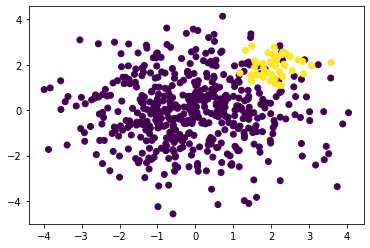

In [14]:
from matplotlib import pyplot
pyplot.scatter(x[:, 0], x[:, 1], c=y)
pyplot.show()

In [10]:
Xtrain, Xtest, Ytrain, Ytest = TTS(x,y,test_size=0.3,random_state=420) 

In [11]:
(y == 1).sum() / y.shape[0]

0.09090909090909091

#### sklearn模式

In [16]:
#sklearn 下建模

In [17]:
clf = XGBC().fit(Xtrain,Ytrain)
ypreds = clf.predict(Xtest)
ypreds

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [20]:
clf.score(Xtest,Ytest)

0.9272727272727272

In [24]:
cm(Ytest,ypreds,labels=[1,0]) #混淆矩阵

array([[  9,   4],
       [  8, 144]])

In [25]:
recall(Ytest,ypreds)

0.6923076923076923

In [26]:
auc(Ytest,clf.predict_proba(Xtest)[:,1])

0.9701417004048585

In [27]:
#随着样本权重逐渐增加，模型的recall,auc和准确率如何变化？
for i in [1,5,10,20,30]:
    clf_ = XGBC(scale_pos_weight=i).fit(Xtrain,Ytrain)
    ypred_ = clf_.predict(Xtest)
    print(i)
    print("\tAccuracy:{}".format(clf_.score(Xtest,Ytest)))
    print("\tRecall:{}".format(recall(Ytest,ypred_)))
    print("\tAUC:{}".format(auc(Ytest,clf_.predict_proba(Xtest)[:,1])))

1
	Accuracy:0.9272727272727272
	Recall:0.6923076923076923
	AUC:0.9701417004048585
5
	Accuracy:0.9393939393939394
	Recall:0.8461538461538461
	AUC:0.9660931174089069
10
	Accuracy:0.9333333333333333
	Recall:0.7692307692307693
	AUC:0.9696356275303644
20
	Accuracy:0.9333333333333333
	Recall:0.7692307692307693
	AUC:0.9686234817813765
30
	Accuracy:0.9393939393939394
	Recall:0.8461538461538461
	AUC:0.9701417004048583


#### xgboost模式

In [28]:
dtrain = xgb.DMatrix(Xtrain,Ytrain)
dtest = xgb.DMatrix(Xtest,Ytest)

In [29]:
#看看xgboost库自带的predict接口
param= {'silent':True,'objective':'binary:logistic',"eta":0.1,"scale_pos_weight":1}
num_round = 100

In [30]:
bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest) #看看preds返回了什么？
preds#返回的是概率

[16:54:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




array([0.00110357, 0.00761518, 0.00110357, 0.00110357, 0.93531454,
       0.00466839, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00110357, 0.00410493, 0.00454478, 0.00571528, 0.00751026,
       0.00110357, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00712637, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.00110357, 0.00793251, 0.00466839,
       0.00110357, 0.00339395, 0.00657186, 0.00110357, 0.00457053,
       0.00571528, 0.0026763 , 0.00110357, 0.00110357, 0.00110357,
       0.00884932, 0.00712637, 0.00110357, 0.00712637, 0.00466839,
       0.00110357, 0.00110357, 0.00712637, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.63748044, 0.00110357, 0.00793251,
       0.00110357, 0.00451971, 0.00644181, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.00751026, 0.00712637, 0.00110357,
       0.00866458, 0.00110357, 0.00110357, 0.00110357, 0.91610

In [31]:
#自己设定阈值
ypred = preds.copy()
ypred[preds > 0.5] = 1
ypred[ypred !=1]=0

In [32]:
#写明参数
scale_pos_weight = [1,5,10]
names = ["negative vs positive: 1","negative vs positive: 5","negative vs positive: 10"] 

In [34]:
#导入模型评估指标
from sklearn.metrics import accuracy_score as accuracy, recall_score as recall, roc_auc_score as auc

In [36]:
for name,i in zip(names,scale_pos_weight):
    param= {'silent':True,'objective':'binary:logistic',"eta":0.1,"scale_pos_weight":i}
    clf = xgb.train(param, dtrain, num_round)
    preds = clf.predict(dtest)
    ypred = preds.copy()
    ypred[preds > 0.5] = 1
    ypred[ypred != 1] = 0
    print(name)
    print("\tAccuracy:{}".format(accuracy(Ytest,ypred)))
    print("\tRecall:{}".format(recall(Ytest,ypred)))
    print("\tAUC:{}".format(auc(Ytest,preds)))

[16:58:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


negative vs positive: 1
	Accuracy:0.9272727272727272
	Recall:0.6923076923076923
	AUC:0.9741902834008097
[16:58:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


negative vs positive: 5
	Accuracy:0.9393939393939394
	Recall:0.8461538461538461
	AUC:0.9635627530364372
[16:58:31] WARNING: /U

In [38]:
#当然我们也可以尝试不同的阈值
for name,i in zip(names,scale_pos_weight):
    for thres in [0.3,0.5,0.7,0.9]:
        param= {'silent':True,'objective':'binary:logistic',"eta":0.1,"scale_pos_weight":i}
        clf = xgb.train(param, dtrain, num_round)
        preds = clf.predict(dtest)
        ypred = preds.copy()
        ypred[preds > thres] = 1
        ypred[ypred != 1] = 0
        print("{},thresholds:{}".format(name,thres))
        print("\tAccuracy:{}".format(accuracy(Ytest,ypred)))
        print("\tRecall:{}".format(recall(Ytest,ypred)))
        print("\tAUC:{}".format(auc(Ytest,preds)))

[16:59:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


negative vs positive: 1,thresholds:0.3
	Accuracy:0.9393939393939394
	Recall:0.8461538461538461
	AUC:0.9741902834008097
[16:59:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


negative vs positive: 1,thresholds:0.5
	Accuracy:0.9272727272727272
	Recall:0.6923076923076923
	AUC:0.974190283